## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Importing Libraries and Data

> MLFrame is my own library included in the repo

In [1]:
# Your code here - remember to use markdown cells for comments as well!
from mltools.mlframe import MLFrame
import pandas as pd
df = MLFrame(pd.read_csv('kc_house_data.csv'))
pd.set_option('display.max_columns',0)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df.drop('date', inplace=True, axis=1)

In [3]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: x if x!='?' else 0)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [4]:
df_ohe = MLFrame(df.one_hot_encode())

In [5]:
df_ohe

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.000,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,3,8,1530,0.000,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,3,8,2310,0.000,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,3,7,1020,0.000,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,400000.000,3,2.500,1600,2388,2.000,nan,0.000,3,8,1600,0.000,2004,0.000,98027,47.535,-122.069,1410,1287


In [6]:
id_counts = df['id'].value_counts()
len(id_counts[id_counts>1])

176

In [7]:
df_ohe.log(['price', 'bathrooms', 'sqft_living', 'sqft_lot'], inplace=True)

In [8]:
#df_ohe.model_and_plot('price')

In [9]:
df_ohe.shape

(21597, 20)

In [10]:
df_ohe.drop_nulls_perc(.001, inplace=True)

In [11]:
df_ohe.lrmodel(target='price', inplace=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     4216.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:19:32   Log-Likelihood:                -1487.1
No. Observations:               21597   AIC:                             3008.
Df Residuals:                   21580   BIC:                             3144.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.6427      3.826     -2.781      0.005     -18.143      -3.143
id            -1.986e-13   6.26e-13     -0.317      0.751   -1.43e-12    1.03e-12
bedrooms         -0.0298      0.003    -11.814      0.000      -0.035      -0.025
bathrooms         0.1216      0.008     14.732      0.000       0.105       0.138
sqft_living       0.1786      0.016     11.511      0.000       0.148       0.209
sqft_lot         -0.0361      0.003    -10.866      0.000      -0.043      -0.030
floors            0.0527      0.005     10.297      0.000       0.043       0.063
condition         0.0567      0.003     18.933      0.000       0.051       0.063
grade             0.1652      0.003     59.527      0.000       0.160       0.171
sqft_above        0.0001   6.98e-06     14.807      0.000    8.96e-05       0.000
sqft_basement     0.0001   7.74e-06     15.230      0.000       0.000       0.000
yr_built         -0.0042   8.97e-05    -46.621      0.000      -0.004      -0.004
zipcode          -0.0005   4.24e-05    -12.900      0.000      -0.001      -0.000
lat               1.3299      0.014     96.141      0.000       1.303       1.357
long             -0.1582      0.017     -9.175      0.000      -0.192      -0.124
sqft_living15     0.0001   4.41e-06     25.378      0.000       0.000       0.000
sqft_lot15     9.149e-07   8.66e-08     10.559      0.000    7.45e-07    1.08e-06
==============================================================================
Omnibus:                      485.233   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.437
Skew:                           0.173   Prob(JB):                    7.26e-194
Kurtosis:                       3.932   Cond. No.                     1.17e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

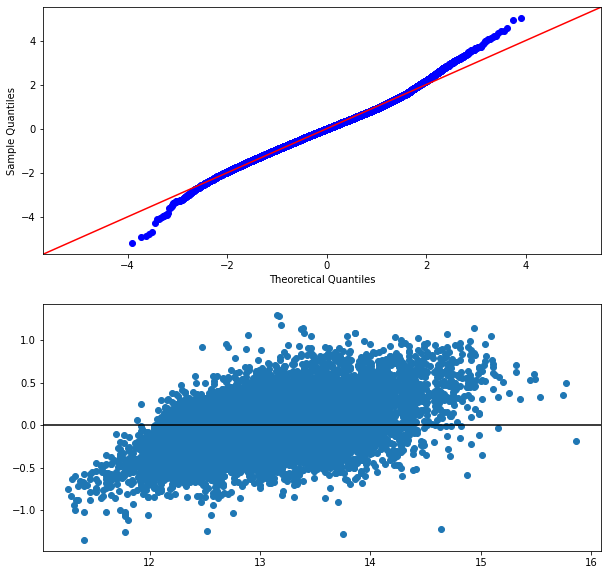

In [12]:
df_ohe.model_and_plot('price')

<AxesSubplot:xlabel='price', ylabel='floors'>

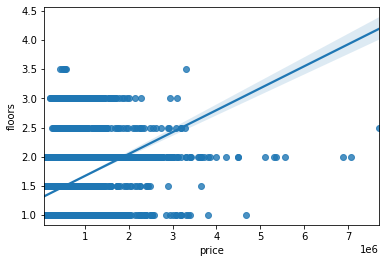

In [13]:
df.regplot('price', 'floors')

In [14]:
df_ohe.lrmodel(target='price', inplace=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     4497.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:19:33   Log-Likelihood:                -1487.2
No. Observations:               21597   AIC:                             3006.
Df Residuals:                   21581   BIC:                             3134.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.7005      3.822     -2.800      0.005     -18.192      -3.209
bedrooms         -0.0298      0.003    -11.813      0.000      -0.035      -0.025
bathrooms         0.1216      0.008     14.735      0.000       0.105       0.138
sqft_living       0.1785      0.016     11.506      0.000       0.148       0.209
sqft_lot         -0.0359      0.003    -10.910      0.000      -0.042      -0.029
floors            0.0528      0.005     10.324      0.000       0.043       0.063
condition         0.0568      0.003     18.941      0.000       0.051       0.063
grade             0.1652      0.003     59.531      0.000       0.160       0.171
sqft_above        0.0001   6.98e-06     14.812      0.000    8.97e-05       0.000
sqft_basement     0.0001   7.74e-06     15.239      0.000       0.000       0.000
yr_built         -0.0042   8.97e-05    -46.626      0.000      -0.004      -0.004
zipcode          -0.0005   4.24e-05    -12.899      0.000      -0.001      -0.000
lat               1.3300      0.014     96.188      0.000       1.303       1.357
long             -0.1586      0.017     -9.221      0.000      -0.192      -0.125
sqft_living15     0.0001   4.41e-06     25.377      0.000       0.000       0.000
sqft_lot15      9.16e-07   8.66e-08     10.581      0.000    7.46e-07    1.09e-06
==============================================================================
Omnibus:                      485.353   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.602
Skew:                           0.173   Prob(JB):                    6.69e-194
Kurtosis:                       3.932   Cond. No.                     2.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

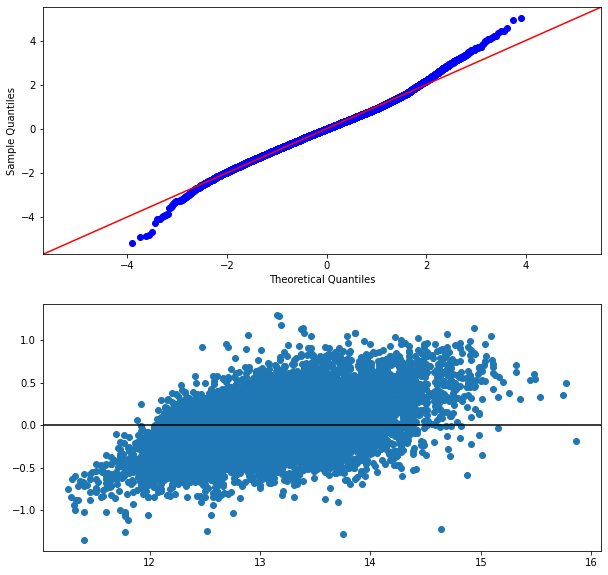

In [15]:
df_ohe.drop(['id'], inplace=True, axis=1)
df_ohe.model_and_plot('price')

In [16]:
df_ohe.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000,0.343,0.520,0.675,0.138,0.311,0.039,0.704,0.602,0.313,0.081,-0.039,0.449,0.051,0.619,0.092
bedrooms,0.343,1.000,0.508,0.622,0.185,0.178,0.026,0.357,0.479,0.297,0.156,-0.154,-0.010,0.132,0.393,0.031
bathrooms,0.520,0.508,1.000,0.761,0.085,0.501,-0.113,0.644,0.642,0.264,0.534,-0.228,0.011,0.241,0.551,0.077
sqft_living,0.675,0.622,0.761,1.000,0.326,0.368,-0.050,0.743,0.832,0.417,0.350,-0.222,0.039,0.257,0.737,0.163
sqft_lot,0.138,0.185,0.085,0.326,1.000,-0.237,0.074,0.184,0.332,0.093,-0.007,-0.282,-0.149,0.376,0.364,0.624
floors,0.311,0.178,0.501,0.368,-0.237,1.000,-0.264,0.459,0.524,-0.242,0.489,-0.060,0.049,0.126,0.280,-0.011
condition,0.039,0.026,-0.113,-0.050,0.074,-0.264,1.000,-0.147,-0.159,0.168,-0.362,0.003,-0.015,-0.106,-0.093,-0.003
grade,0.704,0.357,0.644,0.743,0.184,0.459,-0.147,1.000,0.756,0.166,0.448,-0.186,0.114,0.200,0.714,0.121
sqft_above,0.602,0.479,0.642,0.832,0.332,0.524,-0.159,0.756,1.000,-0.051,0.424,-0.262,-0.001,0.345,0.732,0.195
sqft_basement,0.313,0.297,0.264,0.417,0.093,-0.242,0.168,0.166,-0.051,1.000,-0.130,0.073,0.110,-0.142,0.199,0.016


In [17]:
#%conda list

In [18]:
#!pip3 install --user -U matplotlib

In [19]:
import matplotlib
matplotlib.__version__

'3.3.1'

(<Figure size 1800x1800 with 2 Axes>, <AxesSubplot:>)

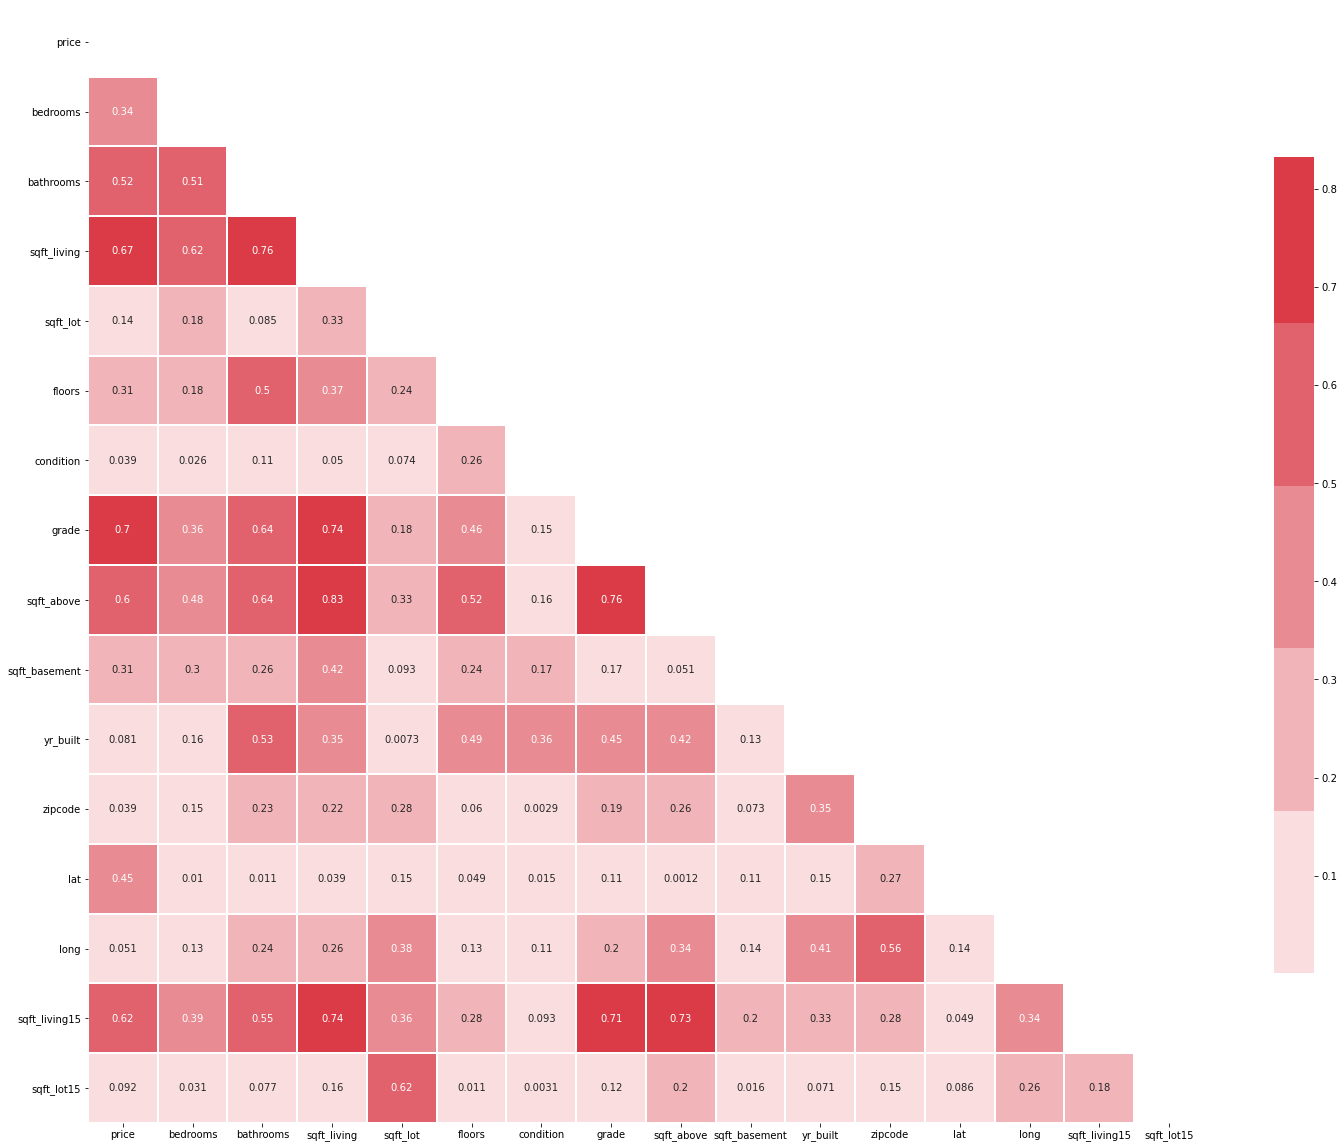

In [20]:
df_ohe.plot_corr()

In [21]:
df_ohe.get_vif_cols('price')

C:\Users\12147\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['sqft_living', 'sqft_above']

In [22]:
df_ohe.get_vif('price')

const           4691444.686
bedrooms              1.757
bathrooms             3.368
sqft_living          13.900
sqft_lot              2.835
floors                2.445
condition             1.220
grade                 3.404
sqft_above           10.710
sqft_basement         3.723
yr_built              2.230
zipcode               1.653
lat                   1.179
long                  1.880
sqft_living15         2.934
sqft_lot15            1.790
dtype: float64

In [23]:
df_ohe.remove_vif_cols('price', inplace=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     4802.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:19:34   Log-Likelihood:                -2117.1
No. Observations:               21597   AIC:                             4262.
Df Residuals:                   21583   BIC:                             4374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.5308      3.931     -2.425      0.015     -17.235      -1.827
bedrooms          0.0024      0.002      1.005      0.315      -0.002       0.007
bathrooms         0.2089      0.008     26.638      0.000       0.194       0.224
sqft_lot         -0.0003      0.003     -0.100      0.921      -0.007       0.006
floors            0.1064      0.005     21.162      0.000       0.097       0.116
condition         0.0551      0.003     17.904      0.000       0.049       0.061
grade             0.2047      0.003     78.348      0.000       0.200       0.210
sqft_basement     0.0001   5.17e-06     21.840      0.000       0.000       0.000
yr_built         -0.0045   9.19e-05    -48.957      0.000      -0.005      -0.004
zipcode          -0.0005   4.36e-05    -11.221      0.000      -0.001      -0.000
lat               1.3088      0.014     92.027      0.000       1.281       1.337
long             -0.1208      0.018     -6.834      0.000      -0.155      -0.086
sqft_living15     0.0002   4.24e-06     39.782      0.000       0.000       0.000
sqft_lot15     6.417e-07   8.87e-08      7.233      0.000    4.68e-07    8.16e-07
==============================================================================
Omnibus:                      550.541   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              991.507
Skew:                           0.208   Prob(JB):                    4.98e-216
Kurtosis:                       3.963   Cond. No.                     2.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

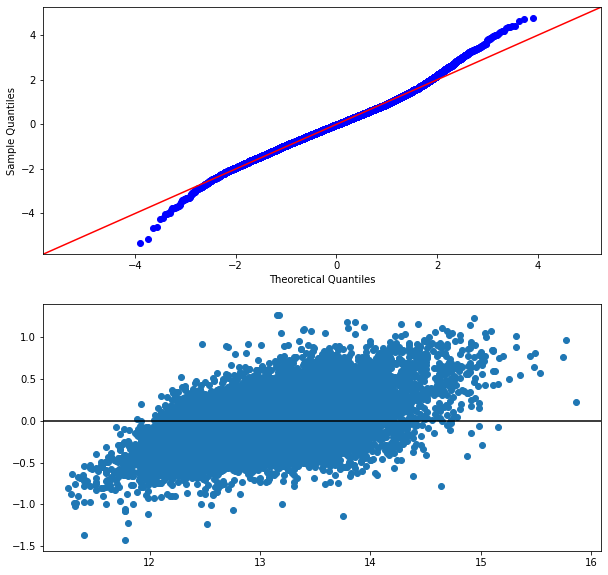

In [24]:
df_ohe.model_and_plot('price')

In [25]:
df_ohe.plot_coef()

,Coefficients
Intercept,-9.5308
bathrooms,0.208934
bedrooms,0.00241426
condition,0.055138
floors,0.106397
grade,0.204728
lat,1.30876
long,-0.120753
sqft_basement,0.000112994
sqft_living15,0.000168604


In [26]:
df_ohe.find_outliers_Z('price').sum()

169

In [27]:
df_ohe.find_outliers_IQR('price').sum()

333

In [29]:
df_ohe = df_ohe[~df_ohe.find_outliers_IQR('price')]

In [31]:
df_ohe = MLFrame(df_ohe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     4283.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:19:57   Log-Likelihood:                -1240.3
No. Observations:               21264   AIC:                             2509.
Df Residuals:                   21250   BIC:                             2620.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.9256      3.813     -3.128      0.002     -19.399      -4.452
bedrooms          0.0034      0.002      1.441      0.150      -0.001       0.008
bathrooms         0.1992      0.008     26.183      0.000       0.184       0.214
sqft_lot         -0.0051      0.003     -1.616      0.106      -0.011       0.001
floors            0.1058      0.005     21.589      0.000       0.096       0.115
condition         0.0529      0.003     17.680      0.000       0.047       0.059
grade             0.1899      0.003     73.360      0.000       0.185       0.195
sqft_basement     0.0001   5.16e-06     20.280      0.000    9.45e-05       0.000
yr_built         -0.0044   8.97e-05    -48.677      0.000      -0.005      -0.004
zipcode          -0.0004   4.23e-05     -9.630      0.000      -0.000      -0.000
lat               1.2939      0.014     94.303      0.000       1.267       1.321
long             -0.0798      0.017     -4.670      0.000      -0.113      -0.046
sqft_living15     0.0002   4.18e-06     39.835      0.000       0.000       0.000
sqft_lot15     7.518e-07   8.63e-08      8.710      0.000    5.83e-07    9.21e-07
==============================================================================
Omnibus:                      383.780   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.425
Skew:                           0.157   Prob(JB):                    1.57e-141
Kurtosis:                       3.795   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

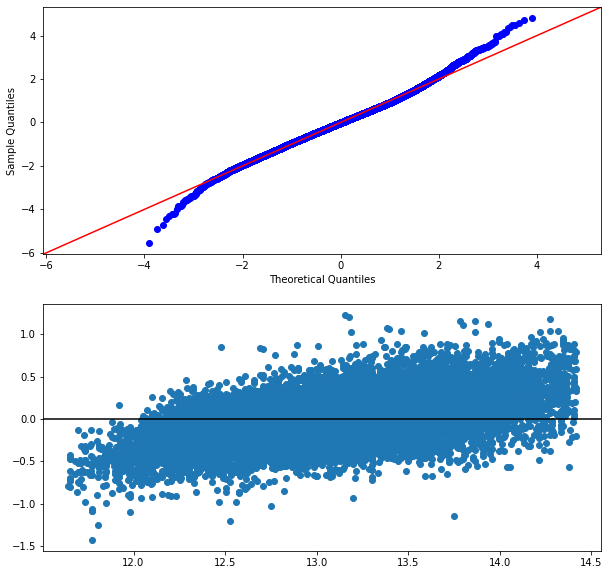

In [32]:
df_ohe.model_and_plot('price')

In [34]:
df_ohe.get_vif('price')

C:\Users\12147\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           4695562.824
bedrooms              1.482
bathrooms             2.795
sqft_lot              2.584
floors                2.251
condition             1.217
grade                 2.720
sqft_basement         1.561
yr_built              2.232
zipcode               1.651
lat                   1.177
long                  1.883
sqft_living15         2.482
sqft_lot15            1.777
dtype: float64